<a href="https://colab.research.google.com/github/georgewhr/vandy_cs8395/blob/main/quantum_computing_grover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grover's Algorithm with Qiskit

## Introduction

Grover's algorithm is a quantum algorithm for searching an unsorted database or an unordered list. It provides a quadratic speedup compared to classical algorithms. This notebook will guide you through the implementation of Grover's algorithm using Qiskit. For the details of Grover's algorithm, please see Grover's Algorithm in the [Qiskit textbook](https://github.com/Qiskit/textbook/tree/main/notebooks/ch-algorithms#).





**References:**

[1]: L. K. Grover, A fast quantum mechanical algorithm for database search. Proceedings 28th Annual Symposium on the Theory of Computing (STOC) 1996, pp. 212-219. https://arxiv.org/abs/quant-ph/9605043

#Grover's Algorithm
Grover’s Algorithm is essentially a search Algorithm. Consider an unsorted data strucutre with N entries, and there must be N-dimensiotn state space which is provided by log2N qubits.
##Grover's Algorithm Baisc Strucutre
**Initialization**:

It starts by setting up a superposition of all possible states using quantum
registers.

**Oracle**:

A function (oracle) is applied to flip the sign of the state corresponding to the solution.

**Amplitude Amplification**:

AKA diffuser function, A series of quantum operations (involving Hadamard transforms
and conditional phase shifts) are used to increase the probability amplitude of the correct answer.

**Measurement**:

Finally, a measurement is performed, which, due to the amplitude
amplification, is more likely to result in the correct answer.

**Limitations**:

While Grover's Algorithm is faster than any classical counterpart for its specific
problem, it's still a probabilistic algorithm, meaning it finds the correct answer with high
probability rather than certainty. Also, it offers a quadratic speedup, which is significant but less
dramatic than the exponential speedup offered by some other quantum algorithms, like Shor's
Algorithm.

**Applications**:

Its primary application is in database searching, but the principles of Grover's
algorithm can be applied to a variety of other problems, such as solving NP-complete problems
and cryptography


#Running Grover's algorithm
We first import a few qiskit library

In [ ]:
!pip install matplotlib numpy qiskit qiskit_aer qiskit-algorithms pylatexenc
import numpy as np
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

Then we define an Orcale function. The function consists of below steps:

Init the oracle ciruit.

Apply X gates to qubits that cooredsponds '0'

Apply Hadamart gate

Apply a Multi-Controlled Toffoli Gate

Undo the initial X gates.

Return the oracle gate


In [ ]:
def oracle(n, solution):
    oracle_qc = QuantumCircuit(n)
    for qubit in range(n):
        if solution[qubit] == '0':
            oracle_qc.x(qubit)
    oracle_qc.h(n-1) # Apply Hadamart gate
    oracle_qc.mcx(list(range(n-1)), n-1)
    oracle_qc.h(n-1)
    for qubit in range(n):
        if solution[qubit] == '0':
            oracle_qc.x(qubit)
    oracle_qc = oracle_qc.to_gate()
    oracle_qc.name = "Oracle"
    return oracle_qc

Define Function of Diffuser(Amplification)



In [ ]:
def diffuser(n):
    diff_qc = QuantumCircuit(n) ## Init the diffuser circuit
    diff_qc.h(range(n)) ## Apply Hadamard gate
    diff_qc.x(range(n)) ## Apply X gate
    diff_qc.h(n-1) ## Apply a Hadamard Gate to the Last Qubit
    diff_qc.mcx(list(range(n-1)), n-1)
    diff_qc.h(n-1)
    diff_qc.x(range(n))
    diff_qc.h(range(n))
    diff_qc = diff_qc.to_gate()
    diff_qc.name = "Diffuser"
    return diff_qc

Init number of qubits we are going to use and the solution

In [ ]:
n = 3
solution = '101'

Create the quantum circuit

In [ ]:
qc = QuantumCircuit(n, n)
qc.h(range(n))

{'110': 10, '001': 10, '100': 10, '111': 5, '011': 9, '000': 7, '010': 10, '101': 963}


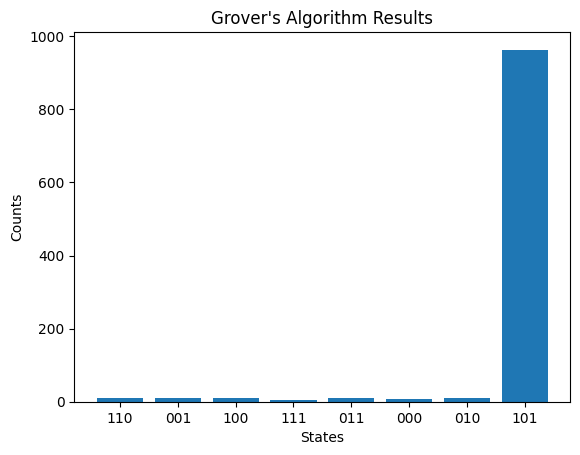

In [ ]:

# from qiskit.providers.aer import QasmSimulator

# Function to create the oracle for a particular solution
def oracle(n, solution):
    oracle_qc = QuantumCircuit(n)
    for qubit in range(n):
        if solution[qubit] == '0':
            oracle_qc.x(qubit)
    oracle_qc.h(n-1)
    oracle_qc.mcx(list(range(n-1)), n-1)  # Multi-controlled Toffoli gate
    oracle_qc.h(n-1)
    for qubit in range(n):
        if solution[qubit] == '0':
            oracle_qc.x(qubit)
    oracle_qc = oracle_qc.to_gate()
    oracle_qc.name = "Oracle"
    return oracle_qc

# Function to create the Grover diffuser
def diffuser(n):
    diff_qc = QuantumCircuit(n)
    diff_qc.h(range(n))
    diff_qc.x(range(n))
    diff_qc.h(n-1)
    diff_qc.mcx(list(range(n-1)), n-1)
    diff_qc.h(n-1)
    diff_qc.x(range(n))
    diff_qc.h(range(n))
    diff_qc = diff_qc.to_gate()
    diff_qc.name = "Diffuser"
    return diff_qc

# Number of qubits
n = 3  # For example, 3 qubits
# Solution to search for
solution = '101'

# Create the quantum circuit
qc = QuantumCircuit(n, n)
qc.h(range(n))  # Apply Hadamard gates

# Apply Grover's algorithm
oracle_gate = oracle(n, solution)
diffuser_gate = diffuser(n)

# Number of Grover iterations
num_iterations = int(np.floor(np.pi/4 * np.sqrt(2**n)))

for _ in range(num_iterations):
    qc.append(oracle_gate, range(n))
    qc.append(diffuser_gate, range(n))

# Measure the qubits
qc.measure(range(n), range(n))

# Execute the circuit
backend = Aer.get_backend('qasm_simulator')
new_c = transpile(qc, backend)
result=backend.run(new_c).result()
counts=result.get_counts()
# counts = result.get_counts()

# Print the results
print(counts)
keys = list(counts.keys())
values = list(counts.values())

plt.bar(keys, values)
plt.xlabel('States')
plt.ylabel('Counts')
plt.title('Grover\'s Algorithm Results')
plt.show()

## Conclusion
The code successfully applies Grover's algorithm to find a solution to the search problem. By creating an oracle gate that marks the solution and a diffuser gate to amplify the probability amplitude of the correct solution, the algorithm performs the necessary number of Grover iterations, which is proportional to the square root of the search space size. After executing the quantum circuit on a QASM simulator backend, the resulting counts are measured and plotted. The output plot displays the frequency of each possible state, highlighting the increased likelihood of observing the correct solution, thereby demonstrating the effectiveness of Grover's algorithm in quantum search problems.